In [1]:
from CPlantBox_PiafMunch import *

In [2]:
name = "carbon2020.xml"
plant = pb.Plant()
plant.openXML("../../modelparameter/plant/" + name)
seeds = plant.getOrganRandomParameter(pb.OrganTypes.seed)
roots = plant.getOrganRandomParameter(pb.OrganTypes.root)
stems = plant.getOrganRandomParameter(pb.OrganTypes.stem)
leafs = plant.getOrganRandomParameter(pb.OrganTypes.leaf)
plant.initialize(True)

In [4]:
for time in range(0,10):
    realtime= time*24
    plant.simulate(time)
    organ = plant.getOrgans()
    plant.write("{}{}{}.vtp".format(realtime,str(name),"equal"))

In [19]:
# make two root system, both grow to 1day at same speed, but one change the growthrate to o.1 the other changed to 10. we can find the difference though output
#test of python modification of growth rate change it to 10
plant.simulate(1)
organ = plant.getOrgans()
plant.write("{}{}{}.vtp".format(1,str(name),"change10"))
organ[0].getParam().r=10
plant.simulate(5)
plant.write("{}{}{}.vtp".format(5,str(name),"change10"))

#test of python modification of growth rate change it to 0.1
plant.simulate(1)
organ = plant.getOrgans()
plant.write("{}{}{}.vtp".format(1,str(name),"change0.1"))
organ[0].getParam().r=0.1
plant.simulate(5)
plant.write("{}{}{}.vtp".format(5,str(name),"change0.1"))

In [9]:
organ[0].getParam().r

10.0

In [30]:
# make two root system, both grow to 1day at same speed, but one change the growthrate to o.1 the other changed to 10. we can find the difference though output
#test of python modification of growth rate change it to 10
plant.simulate(1)
organ = plant.getOrgans()
plant.write("{}{}{}.vtp".format(1,str(name),"change10"))
organ[0].getParam().r=10
plant.simulate(5)
plant.write("{}{}{}.vtp".format(5,str(name),"change10"))

In [5]:
# setting root water potential (this can be changeed by resistance )
# getting id (check the nodeId of one orgen children and then check if it belongs to)
# rewrite growth rate

plant.simulate(time)
plant.write("{}.vtp".format(str(name)))
dict_all  = convert( plant )
piafmunch_outputname = name +".ini"

write_PiafMunch_parameter(dict_all['node_connection'], dict_all['nodes_organtype'], dict_all['nodes_r_st'], dict_all['unq_cnt'], piafmunch_outputname)


output successful


In [60]:
organ = plant.getOrgans()
nodeIDtoOrgan = [0]*plant.getNumberOfNodes()
i =0
for i in range(0, len(organ)):
    j=0
    for j in range(0,organ[i].getNumberOfNodes()):
        nodeIDtoOrgan[organ[i].getNodeId(j)]=i+1
        
nodeIDtoOrgan[organ[i].getNodeId(j)]=i+1


217

In [71]:
organ = plant.getOrgans()
nodeIDtoOrgan = [0]*plant.getNumberOfNodes()
i =0
for i in range(0, len(organ)):
    j=0
    for j in range(0,organ[i].getNumberOfNodes()):
        nodeIDtoOrgan[organ[i].getNodeId(j)]=i+1

In [68]:
organ[3].getNodeId(1)

106

In [ ]:
nodeIDtoOrgan

In [6]:
dict_all  = convert( plant )
piafmunch_outputname = name +".ini"
write_PiafMunch_parameter(dict_all['node_connection'], dict_all['nodes_organtype'], dict_all['nodes_r_st'], dict_all['unq_cnt'], piafmunch_outputname)
nodes_organtype = dict_all['nodes_organtype']
N1R_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & (nodes_organtype[:,1] ==2 ) & (nodes_organtype[:,2] ==1 )]
N1L_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & ((nodes_organtype[:,1] ==4)|(nodes_organtype[:,1] ==3)  ) & (nodes_organtype[:,2] ==1 )]

output successful


In [83]:
nodeIDtoOrgan[int(N1R_node[1][0])]

3

In [16]:
dict_all

{'node_connection': array([[  1,   2],
        [  2,   3],
        [  3,   4],
        [  4,   5],
        [  5,   6],
        [  6,   7],
        [  7,   8],
        [  8,  24],
        [ 24,  25],
        [ 25,  26],
        [ 26,  27],
        [ 27,  28],
        [ 28,  29],
        [ 29,  30],
        [ 30,  31],
        [ 31,  32],
        [ 32,  33],
        [ 33,  34],
        [ 34,  35],
        [ 35,  36],
        [ 36,  58],
        [ 58,  59],
        [ 59,  60],
        [ 60,  65],
        [ 65,  66],
        [ 66,  67],
        [ 67,  68],
        [ 68,  69],
        [ 69,  70],
        [ 70,  71],
        [ 71,  72],
        [ 72,  73],
        [ 73,  74],
        [ 74,  75],
        [ 75,  76],
        [ 76,  97],
        [ 97,  98],
        [ 98,  99],
        [ 99, 100],
        [100, 101],
        [101, 102],
        [102, 103],
        [103, 104],
        [104, 105],
        [105, 106],
        [106, 107],
        [107, 108],
        [108, 109],
        [109, 124],
 

In [4]:
day = 1
hour= day*24
plant.simulate(day)
organ = plant.getOrgans()
plant.write("{}{}{}.vtp".format(hour,str(name),"1st_test"))
dict_all  = convert( plant )
piafmunch_outputname = name +".ini"
Soil_water = [0]*(len(dict_all['node_connection'])+1)
write_PiafMunch_parameter(dict_all['node_connection'], dict_all['nodes_organtype'], dict_all['nodes_r_st'], dict_all['unq_cnt'], Soil_water,piafmunch_outputname,hour)



output successful


In [5]:
os.system(' /mnt/c/prog_sct.bas/programs/C++/PIAFMunch2/projects/PIAFMunch2.exe {} -noGUI -q'.format(piafmunch_outputname))
now = datetime.datetime.now()
os.system('mv ./{}_{}-{:02}-{:02}*output.txt  ./{}_output.txt'.format(name, now.year ,now.month, now.day,name ) )

nodeIDtoOrgan = [0]*plant.getNumberOfNodes()
i =0
for i in range(0, len(organ)):
    j=0
    for j in range(0,organ[i].getNumberOfNodes()):
        nodeIDtoOrgan[organ[i].getNodeId(j)]=i+1

nodes_organtype = dict_all['nodes_organtype']
N1R_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & (nodes_organtype[:,1] ==2 ) & (nodes_organtype[:,2] ==1 )]
N1L_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & ((nodes_organtype[:,1] ==4)|(nodes_organtype[:,1] ==3)  ) & (nodes_organtype[:,2] ==1 )]
piaf_output = read_output(name,  dict_all["node_connection"])
print(piaf_output["Q_ST"])

/mnt/c/cpb5/tutorial/jupyter/CPlantBox_PiafMunch.py:866: FutureWarning:

read_table is deprecated, use read_csv instead.



at Nr. 495 we can find JW_Trsv (ml / h)[ 1]
the end is P_PhlApo (MPa)[ 1]
at Nr. 381 we can find JW_Apo (ml / h)[ 1]
the end is JW_ParMb (ml / h)[ 1]
at Nr. 723 we can find P_Xyl (MPa)[ 1]
the end is PsiSoil (MPa)[ 1]
at Nr. 571 we can find P_ST (MPa)[ 1]
the end is P_ST_dot (MPa / h)[ 1]
at Nr. 1217 we can find Q_ST (mmol)[ 1]
the end is JS_ST (mmol / h)[ 1]
at Nr. 115 we can find C_ST (mmol / ml)[ 1]
the end is C_Sympl (mmol / ml)[ 1]
at Nr. 1369 we can find JW_Xyl (ml / h)[ 1]
the end is JW_Xyl (ml / h)[38] 
at Nr. 1293 we can find JW_ST (ml / h)[ 1]
the end is JW_ST (ml / h)[38]
at Nr. 1255 we can find JS_ST (mmol / h)[ 1]
the end is JS_ST (mmol / h)[38]
[[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [6.98076e-07 3.41887e-07 1.20333e-07 ... 5.67830e-06 3.56205e-06
  4.01163e-06]
 [3.53674e-06 3.20247e-06 2.87220e-06 ... 7.30450e-06 5.65762e-06
  5.91364e-06]
 ...
 [2.13161e-05 2.11297e-05 2.09437e-05 ... 2.30069e-05 2.25244e-05
  2.25699e-05]
 [2.

In [11]:
piaf_output["P_Xyl"]

array([[ 1.00006e+00,  1.00005e+00,  1.00004e+00, ...,  1.00000e+00,
         1.00000e+00,  1.00000e+00],
       [ 7.11543e-01,  7.11591e-01,  7.11632e-01, ...,  7.11694e-01,
         7.11694e-01,  7.11694e-01],
       [ 5.06108e-01,  5.06169e-01,  5.06232e-01, ...,  5.06510e-01,
         5.06510e-01,  5.06510e-01],
       ...,
       [-3.66966e-04, -3.32392e-04, -2.97235e-04, ..., -6.86556e-06,
        -4.65670e-06, -2.36857e-06],
       [-3.67072e-04, -3.32487e-04, -2.97319e-04, ..., -6.84741e-06,
        -4.64391e-06, -2.36180e-06],
       [-3.67153e-04, -3.32560e-04, -2.97383e-04, ..., -6.83051e-06,
        -4.63222e-06, -2.35576e-06]])

In [11]:
len(N1R_node)

2

In [14]:
piaf_output["Q_ST"][int(N1R_node[1][0])][-1]
# piaf_output["Q_ST"][int(N1R_node[0][0])][-1]

2.0885399999999998e-05

In [17]:
nodeIDtoOrgan = [0]*plant.getNumberOfNodes()
i =0
for i in range(0, len(organ)):
    j=0
    for j in range(0,organ[i].getNumberOfNodes()):
        nodeIDtoOrgan[organ[i].getNodeId(j)]=i+1

In [21]:
nodeIDtoOrgan[int(N1R_node[1][0])]

1

In [18]:
organ[nodeIDtoOrgan[int(N1R_node[0][0])]].getParam().r

2.0

In [19]:
organ[nodeIDtoOrgan[int(N1R_node[1][0])]].getParam().r

2.0

In [6]:
ana = pb.SegmentAnalyser(plant)
ana.write("{}.vtp".format(str(name)))

In [7]:
nodes_organtype = dict_all['nodes_organtype']
N1R_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & (nodes_organtype[:,1] ==2 ) & (nodes_organtype[:,2] ==1 )]
N1L_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & ((nodes_organtype[:,1] ==4)|(nodes_organtype[:,1] ==3)  ) & (nodes_organtype[:,2] ==1 )]

In [8]:

nodes_cor = python_nodes(plant)

In [9]:
for i in range(len(N1R_node)):
    print(nodes_cor[int(N1R_node[i][0])])

[ 1.20000000e+01  2.00000000e+00  1.00000000e+00 -2.73409015e-03
  2.29506125e-04 -5.95507245e-02]


In [14]:

N1R_node

array([[12.,  2.,  1.,  1.]])

In [93]:
os.system(' /mnt/c/prog_sct.bas/programs/C++/PIAFMunch2/projects/PIAFMunch2.exe {} -noGUI -q'.format(piafmunch_outputname))

768

In [75]:
now = datetime.datetime.now()
os.system('mv ./{}_{}-{:02}-{:02}*output.txt  ./{}_output.txt'.format(name, now.year ,now.month, now.day,name ) )


0

In [45]:
piaf_output = read_output(name,  dict_all["node_connection"])

/home/xr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

read_table is deprecated, use read_csv instead.



at Nr. 365 we can find JW_Trsv (ml / h)[ 1]
the end is P_Sympl_dot (MPa / h)[11]
at Nr. 281 we can find JW_Apo (ml / h)[ 1]
the end is P_ST (MPa)[11]
at Nr. 533 we can find P_Xyl (MPa)[ 1]
the end is Q_PhlApo (mmol)[11]
at Nr. 421 we can find P_ST (MPa)[ 1]
the end is PsiSoil (MPa)[11]


KeyError: 'Q_ST (mmol)[ 1]'

In [37]:
piaf_output["time"]

array([ 0.      ,  0.166667,  0.333334,  0.500001,  0.666668,  0.833335,
        1.      ,  1.16667 ,  1.33334 ,  1.5     ,  1.66667 ,  1.83334 ,
        2.      ,  2.16667 ,  2.33334 ,  2.5     ,  2.66667 ,  2.83334 ,
        3.00001 ,  3.16667 ,  3.33334 ,  3.50001 ,  3.66667 ,  3.83334 ,
        4.00001 ,  4.16667 ,  4.33334 ,  4.50001 ,  4.66668 ,  4.83334 ,
        5.00001 ,  5.16668 ,  5.33334 ,  5.50001 ,  5.66668 ,  5.83334 ,
        6.00001 ,  6.16668 ,  6.33335 ,  6.50001 ,  6.66668 ,  6.83335 ,
        7.00001 ,  7.16668 ,  7.33335 ,  7.50001 ,  7.66668 ,  7.83335 ,
        8.00002 ,  8.16668 ,  8.33335 ,  8.50002 ,  8.66668 ,  8.83335 ,
        9.00002 ,  9.16668 ,  9.33335 ,  9.50002 ,  9.66669 ,  9.83335 ,
       10.      , 10.1667  , 10.3334  , 10.5     , 10.6667  , 10.8334  ,
       11.      , 11.1667  , 11.3334  , 11.5     , 11.6667  , 11.8334  ,
       12.      , 12.1667  , 12.3334  , 12.5     , 12.6667  , 12.8334  ,
       13.      , 13.1667  , 13.3334  , 13.5     , 

In [28]:
def read_output(name, node_connection= dict_all["node_connection"],  ):
    path = name+'_output.txt'
    #path = 'PiafMunch2_PMA1_output.txt'
    output = pd.read_table(path,sep='\t',header=1)
    time = np.array(output.iloc[:,0])
    ##################### Segment Values ##################### 

    # water exchange between xylem and phloem from output of PiafMunch
    n_begin = output.columns.get_loc("JW_Trsv (ml / h)[{first: >{width}}]".format(first='1', width=2))
    print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
    n_end = n_begin + len(node_connection)
    print('the end is',output.columns[n_end])
    JW_Trsv = np.array(output.iloc[:,n_begin:n_end])

    # water exchange between xylem and phloem from output of PiafMunch
    n_begin = output.columns.get_loc("JW_Apo (ml / h)[{first: >{width}}]".format(first='1', width=2))
    print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
    n_end = n_begin + len(node_connection)
    print('the end is',output.columns[n_end])
    JW_Apo = np.array(output.iloc[:,n_begin:n_end])

    # Hydraulic pressure in xylem from output of PiafMunch
    n_begin = output.columns.get_loc("P_Xyl (MPa)[{first: >{width}}]".format(first='1', width=2))
    print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
    n_end = n_begin + len(node_connection)
    print('the end is',output.columns[n_end])
    P_Xyl = np.array(output.iloc[:,n_begin:n_end])

    # Hydraulic pressure in sievetubes from output of PiafMunch
    n_begin = output.columns.get_loc("P_ST (MPa)[{first: >{width}}]".format(first='1', width=2))
    print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
    n_end = n_begin + len(node_connection)
    print('the end is',output.columns[n_end])
    P_ST = np.array(output.iloc[:,n_begin:n_end])

    # Carbon content in the segment from output of PiafMunch
    n_begin = output.columns.get_loc("Q_ST (mmol)[{first: >{width}}]".format(first='1', width=2))
    print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
    n_end = n_begin + len(node_connection)
    print('the end is',output.columns[n_end])
    Q_ST = np.array(output.iloc[:,n_begin:n_end])

    # Carbon content in the segment from output of PiafMunch
    n_begin = output.columns.get_loc("C_ST (mmol / ml)[{first: >{width}}]".format(first='1', width=2))
    print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
    n_end = n_begin + len(node_connection)
    print('the end is',output.columns[n_end])
    C_ST = np.array(output.iloc[:,n_begin:n_end])

    ##################### Connection Values ##################### 

    # Xylem water flow JW_Xyl from output of PiafMunch
    n_begin = output.columns.get_loc("JW_Xyl (ml / h)[{first: >{width}}]".format(first='1', width=2))
    print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
    n_end = n_begin + len(node_connection)-1
    print('the end is',output.columns[n_end])
    JW_Xyl = np.array(output.iloc[:,n_begin:n_end])

    # Phloem water flow JW_ST from output of PiafMunch
    n_begin = output.columns.get_loc("JW_ST (ml / h)[{first: >{width}}]".format(first='1', width=2))
    print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
    n_end = n_begin + len(node_connection)-1
    print('the end is',output.columns[n_end])
    JW_ST = np.array(output.iloc[:,n_begin:n_end])


    # Phloem carbon flow JS_ST from output of PiafMunch
    n_begin = output.columns.get_loc("JS_ST (mmol / h)[{first: >{width}}]".format(first='1', width=2))
    print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
    n_end = n_begin + len(node_connection)-1
    print('the end is',output.columns[n_end])
    JS_ST = np.array(output.iloc[:,n_begin:n_end])
    return {"time":time, "JW_Trsv":JW_Trsv,"JW_Apo": JW_Apo, "P_Xyl": P_Xyl, "P_ST":P_ST, "Q_ST": Q_ST, "C_ST": C_ST, "JW_Xyl": JW_Xyl, "JW_ST": JW_ST, "JS_ST": JS_ST}



In [34]:
path = name+'_output.txt'
node_connection= dict_all["node_connection"]
#path = 'PiafMunch2_PMA1_output.txt'
output = pd.read_table(path,sep='\t',header=1)
time = np.array(output.iloc[:,0])
##################### Segment Values ##################### 

# water exchange between xylem and phloem from output of PiafMunch
n_begin = output.columns.get_loc("JW_Trsv (ml / h)[{first: >{width}}]".format(first='1', width=2))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)
print('the end is',output.columns[n_end])
JW_Trsv = np.array(output.iloc[:,n_begin:n_end])

# water exchange between xylem and phloem from output of PiafMunch
n_begin = output.columns.get_loc("JW_Apo (ml / h)[{first: >{width}}]".format(first='1', width=2))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)
print('the end is',output.columns[n_end])
JW_Apo = np.array(output.iloc[:,n_begin:n_end])

# Hydraulic pressure in xylem from output of PiafMunch
n_begin = output.columns.get_loc("P_Xyl (MPa)[{first: >{width}}]".format(first='1', width=2))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)
print('the end is',output.columns[n_end])
P_Xyl = np.array(output.iloc[:,n_begin:n_end])

# Hydraulic pressure in sievetubes from output of PiafMunch
n_begin = output.columns.get_loc("P_ST (MPa)[{first: >{width}}]".format(first='1', width=2))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)
print('the end is',output.columns[n_end])
P_ST = np.array(output.iloc[:,n_begin:n_end])

# Carbon content in the segment from output of PiafMunch
n_begin = output.columns.get_loc("Q_ST (mmol)[{first: >{width}}]".format(first='1', width=2))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)
print('the end is',output.columns[n_end])
Q_ST = np.array(output.iloc[:,n_begin:n_end])

# Carbon content in the segment from output of PiafMunch
n_begin = output.columns.get_loc("C_ST (mmol / ml)[{first: >{width}}]".format(first='1', width=2))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)
print('the end is',output.columns[n_end])
C_ST = np.array(output.iloc[:,n_begin:n_end])

##################### Connection Values ##################### 

# Xylem water flow JW_Xyl from output of PiafMunch
n_begin = output.columns.get_loc("JW_Xyl (ml / h)[{first: >{width}}]".format(first='1', width=2))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JW_Xyl = np.array(output.iloc[:,n_begin:n_end])

# Phloem water flow JW_ST from output of PiafMunch
n_begin = output.columns.get_loc("JW_ST (ml / h)[{first: >{width}}]".format(first='1', width=2))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JW_ST = np.array(output.iloc[:,n_begin:n_end])


# Phloem carbon flow JS_ST from output of PiafMunch
n_begin = output.columns.get_loc("JS_ST (mmol / h)[{first: >{width}}]".format(first='1', width=2))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JS_ST = np.array(output.iloc[:,n_begin:n_end])


/home/xr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

read_table is deprecated, use read_csv instead.



at Nr. 1951 we can find JW_Trsv (ml / h)[ 1]
the end is P_PhlApo (MPa)[ 1]
at Nr. 1501 we can find JW_Apo (ml / h)[ 1]
the end is JW_ParMb (ml / h)[ 1]
at Nr. 2851 we can find P_Xyl (MPa)[ 1]
the end is PsiSoil (MPa)[ 1]
at Nr. 2251 we can find P_ST (MPa)[ 1]
the end is P_ST_dot (MPa / h)[ 1]
at Nr. 4801 we can find Q_ST (mmol)[ 1]
the end is JS_ST (mmol / h)[ 1]
at Nr. 451 we can find C_ST (mmol / ml)[ 1]
the end is C_Sympl (mmol / ml)[ 1]
at Nr. 5401 we can find JW_Xyl (ml / h)[ 1]
the end is JW_Xyl (ml / h)[150] 
at Nr. 5101 we can find JW_ST (ml / h)[ 1]
the end is JW_ST (ml / h)[150]
at Nr. 4951 we can find JS_ST (mmol / h)[ 1]
the end is JS_ST (mmol / h)[150]


In [35]:
time

array([ 0.      ,  0.166667,  0.333334,  0.500001,  0.666668,  0.833335,
        1.      ,  1.16667 ,  1.33334 ,  1.5     ,  1.66667 ,  1.83334 ,
        2.      ,  2.16667 ,  2.33334 ,  2.5     ,  2.66667 ,  2.83334 ,
        3.00001 ,  3.16667 ,  3.33334 ,  3.50001 ,  3.66667 ,  3.83334 ,
        4.00001 ,  4.16667 ,  4.33334 ,  4.50001 ,  4.66668 ,  4.83334 ,
        5.00001 ,  5.16668 ,  5.33334 ,  5.50001 ,  5.66668 ,  5.83334 ,
        6.00001 ,  6.16668 ,  6.33335 ,  6.50001 ,  6.66668 ,  6.83335 ,
        7.00001 ,  7.16668 ,  7.33335 ,  7.50001 ,  7.66668 ,  7.83335 ,
        8.00002 ,  8.16668 ,  8.33335 ,  8.50002 ,  8.66668 ,  8.83335 ,
        9.00002 ,  9.16668 ,  9.33335 ,  9.50002 ,  9.66669 ,  9.83335 ,
       10.      , 10.1667  , 10.3334  , 10.5     , 10.6667  , 10.8334  ,
       11.      , 11.1667  , 11.3334  , 11.5     , 11.6667  , 11.8334  ,
       12.      , 12.1667  , 12.3334  , 12.5     , 12.6667  , 12.8334  ,
       13.      , 13.1667  , 13.3334  , 13.5     , 

In [102]:
nodes_organtype = dict_all['nodes_organtype']
plt.style.use('default')
x = np.array(output.iloc[:,0])
def add_day_night():
    #trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    #ax.fill_between(x, np.min(y), np.max(y), where=[ 12<x<18] , facecolor='lightgrey', alpha=1, interpolate=False,zorder=0,transform=trans)
    for i in range(0,4):
        ax.axvspan(0,5,facecolor='lightgrey', zorder=0)
        ax.axvspan(18+24*i,29+24*i,facecolor='lightgrey',zorder=0)
def line_style(int): #set line style in the plot figure
    if  32<int<36 : #int is a small part of main stem which are shown in dashed line 
        return ':'
    else: #
        return '-'
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
root_line = mlines.Line2D([], [], color='wheat', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Root')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')
stem_line1 = mlines.Line2D([], [], color='darkgreen', marker='', linestyle=':', linewidth= 5,
                          markersize=30, label='Stem\n between\n two\n leaves')
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 24})
import numpy as np
f = plt.figure()
plt.rcParams.update({'legend.fontsize': 18})
f.subplots_adjust(wspace=0.3)


def organ_color(int):
    if int == 34 or 40 or 51 or 46: #int is source 
        return 'lightgreen'
    elif int == 10: #int root
        return 'wheat'
    elif int == 17 or 29:
        return 'darkgreen'
    else:
        return 'darkgreen'
stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 3)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 

def organ_color_n(int):
    if nodes_organtype[int,1] == 4: #int is source 
        return 'lightgreen'
    elif nodes_organtype[int,1] == 2: #int is sink
        return 'wheat'
    elif nodes_organtype[int,1] == 3:
        return 'darkgreen'
    else:
        return 'silver'    

def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'silver'   

######################################### First Figure ################################################
ax = plt.subplot(221)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
plt.xlabel("Time (hour)")
plt.ylabel("Xylem Pressure (MPa)", color='black')
plt.title("A: Xylem Pressure", color='black' ,loc="left")
for i in range(len(node_connection)):
    ax.plot(x,[pt[i] for pt in P_Xyl], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color_n(i),alpha=0.8,zorder=0, ls = line_style(node_connection[i,0]))
green_star = mlines.Line2D([], [], color='darkgreen', marker='s', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='22nd node')
orange_cross = mlines.Line2D([], [], color='orange', marker='v', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='10th node')
lgreen_circle = mlines.Line2D([], [], color='lightgreen', marker='o', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='49th node')
star = mlines.Line2D([], [], color='grey', marker='s', linestyle='',
                          markersize=16, label='Stem')
cross = mlines.Line2D([], [], color='grey', marker='v', linestyle='',
                          markersize=16, label='Root')
circle = mlines.Line2D([], [], color='grey', marker='o', linestyle='',
                          markersize=16, label='Leaf')
add_day_night()

######################################### Second Figure ################################################
ax = plt.subplot(222)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
plt.xlabel("Time (hour)")
plt.ylabel("Xylem Water Flow (ml h$^{-1}$)")
plt.title("B: Xylem Water Flow",loc="left")
for i in range(len(node_connection)-1):
    ax.plot(x,[pt[i] for pt in JW_Xyl], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.8,zorder=0, ls = line_style(node_connection[i,0]))
#ax.set_ylim(0, 0.0005)
add_day_night()


######################################### Third Figure ################################################
ax = plt.subplot(223)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)


plt.xlabel("Time (hour)")

plt.ylabel('Water from Xylem to Phloem (ml h⁻¹)', color='black')

#plt.title('Phloem Carbon Flow with Diurnal Transpiration')


plt.title('C: Water from Xylem to Phloem', color='black', loc="left")  
for i in range(len(np.transpose(JW_Trsv))-1):
        ax.plot(x,[pt[i] for pt in JW_Trsv], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(i),alpha=0.8, ls = line_style(node_connection[i,0]))

add_day_night()

######################################### Fourth Figure ################################################
ax = plt.subplot(224)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
plt.xlabel("Time (hour)")
plt.ylabel('Carbon Flow (mmol h⁻¹)', color='black')
plt.title('D: Phloem Carbon Flow', color='black',loc="left")  
for i in range(len(np.transpose(JS_ST))):
        ax.plot(x,[pt[i] for pt in JS_ST], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.8, ls = line_style(node_connection[i,0]))
add_day_night()
plt.show()
f.savefig("diural.png", bbox_inches='tight')

NameError: name 'output' is not defined

In [ ]:
nodes_cor

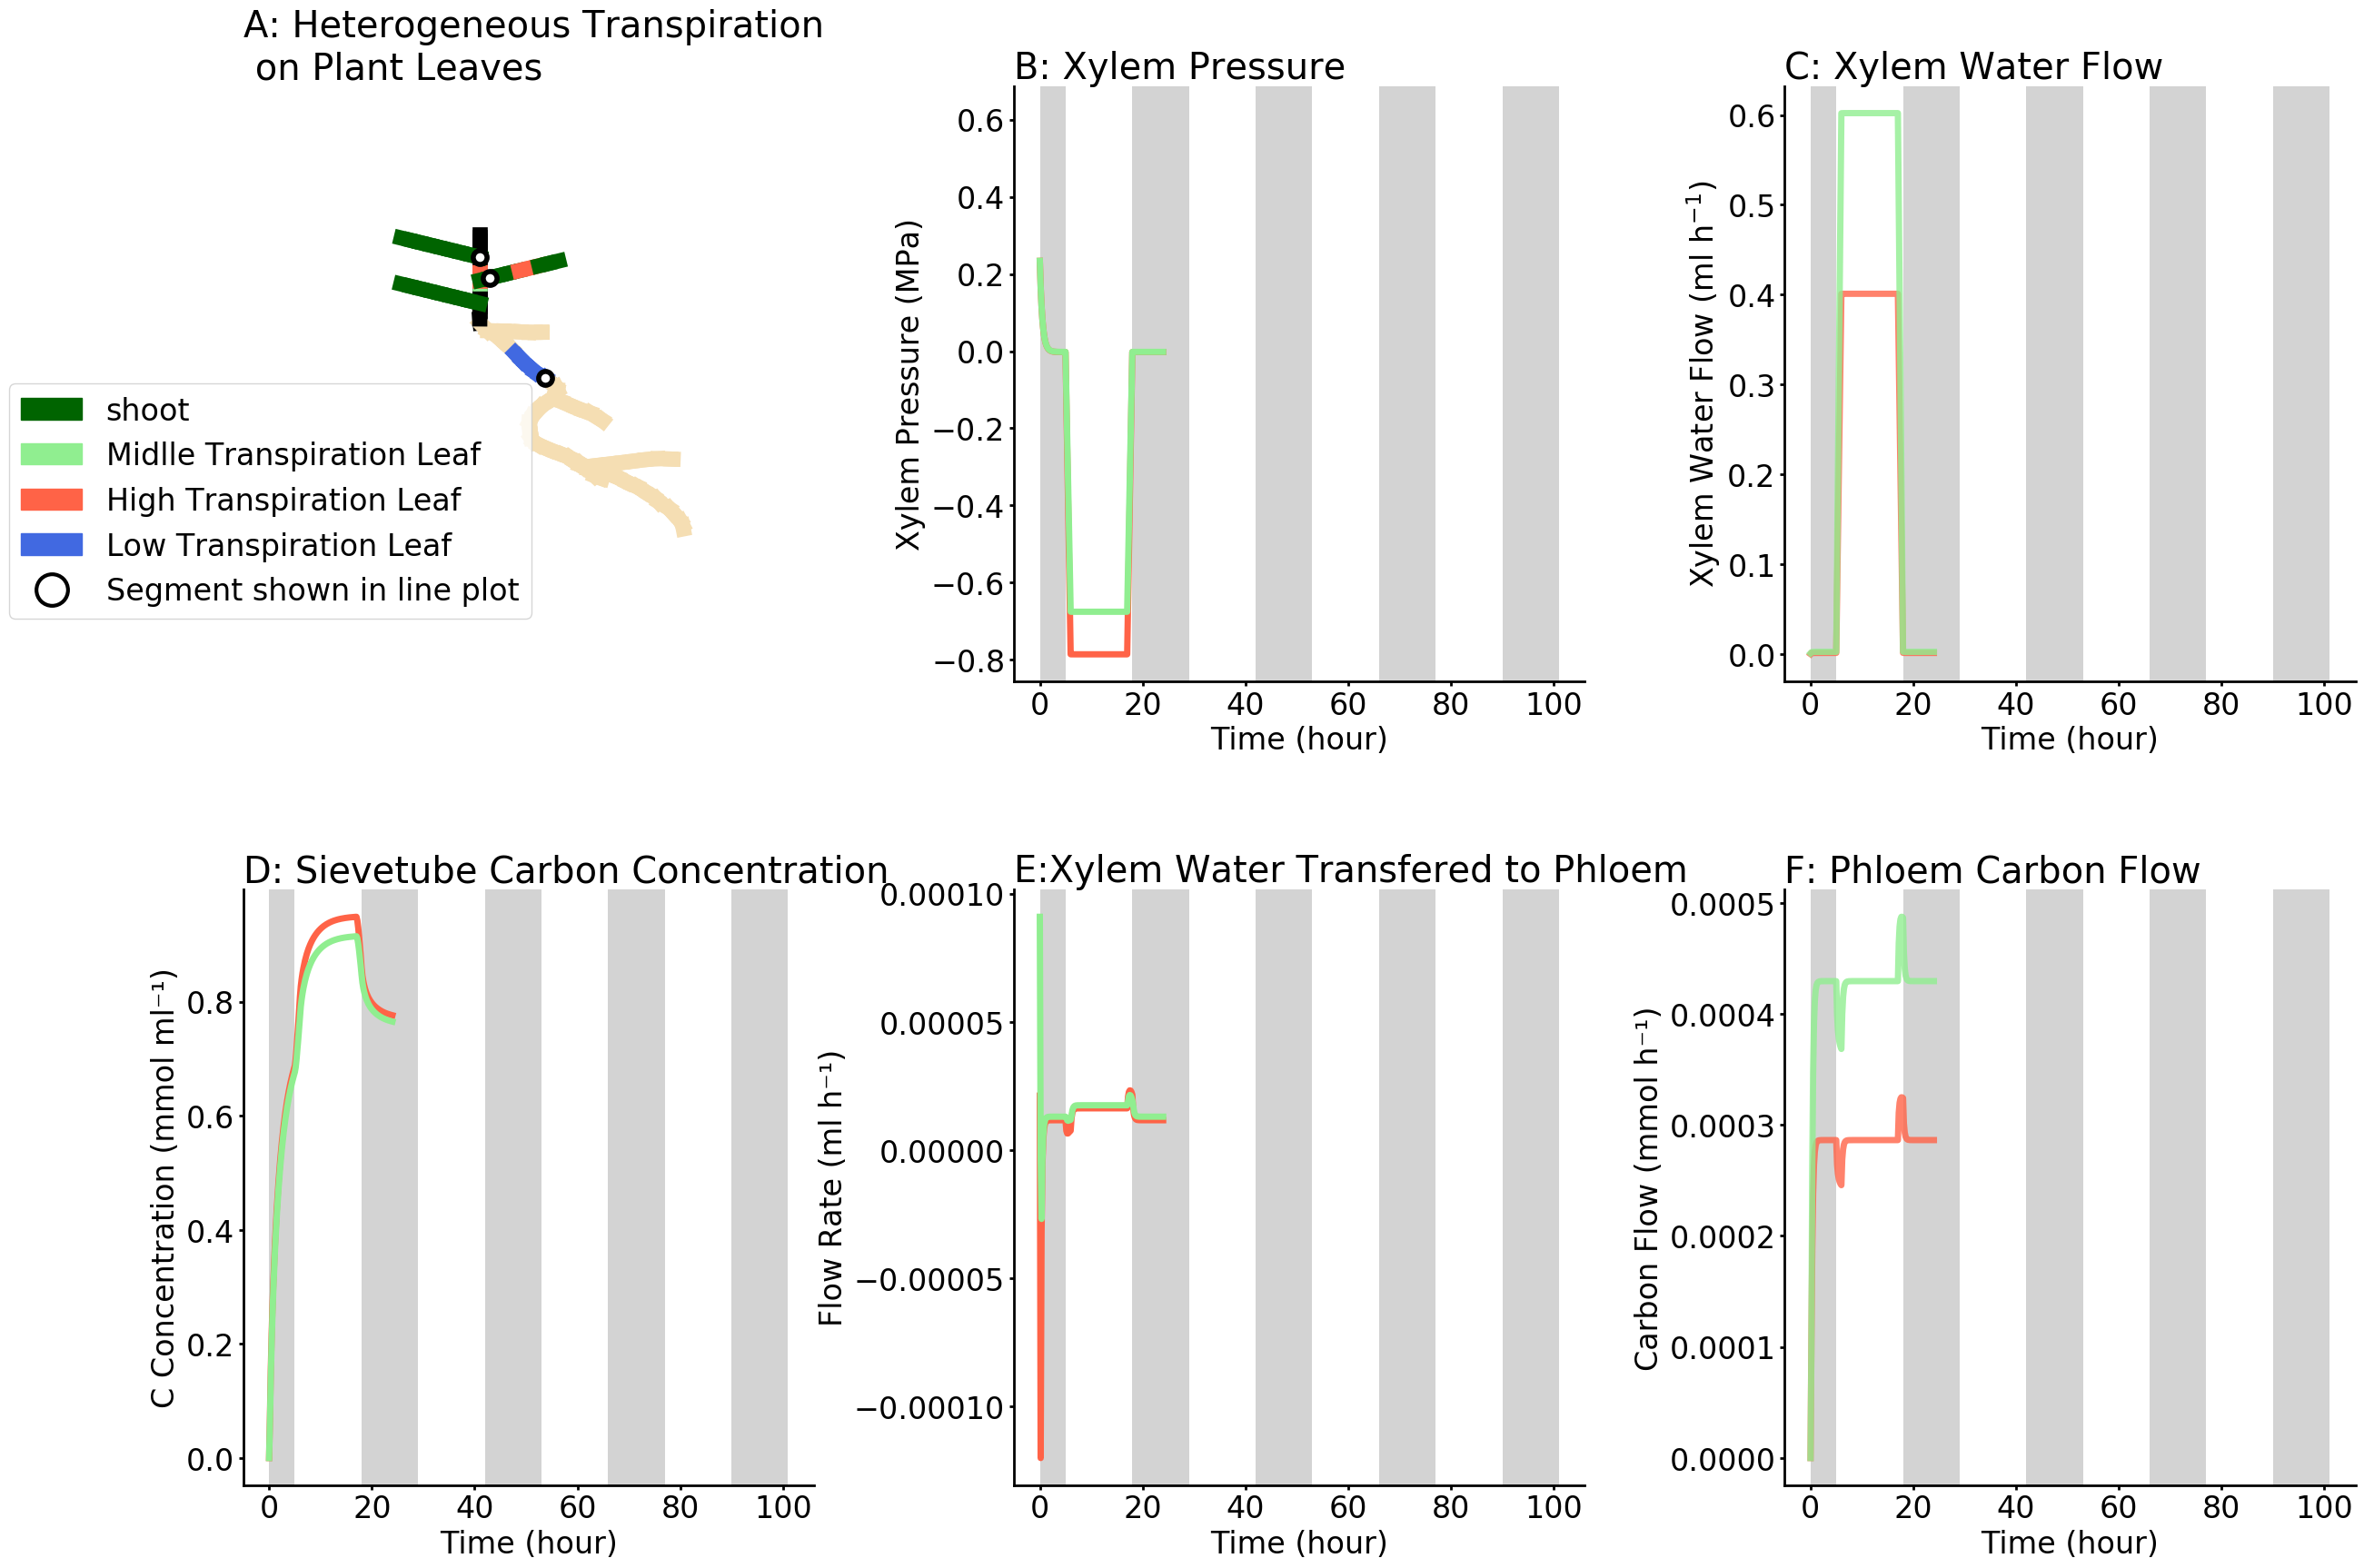

In [55]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
output = piaf_output
# with heterogeneous soil
plt.style.use('default')
lable_size=16
title_size =24
plt.rcParams.update({'font.size': 24})
def line_style(int): #set line style in the plot figure
    if  32<int<36 : #int is a small part of main stem which are shown in dashed line 
        return '-'
    else: #
        return '-'


#plt.rcParams['axes.facecolor'] = 'lightgrey'    
def add_day_night():
    #trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    #ax.fill_between(x, np.min(y), np.max(y), where=[ 12<x<18] , facecolor='lightgrey', alpha=1, interpolate=False,zorder=0,transform=trans)
    for i in range(0,4):
        ax.axvspan(0,5,facecolor='lightgrey', zorder=0)
        ax.axvspan(18+24*i,29+24*i,facecolor='lightgrey',zorder=0)
        

stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 
# high_leaf =[47,48,49,50,51,52,53,54]
# leaf1 =[42]
# high_leaf1 =[51]
# high_leaf2 =[52]
# high_leaf3 =[53]
# high_leaf4 =[54]
# h_l_c=[19]
# l_l_c=[11]
# low_leaf =[25,26,27,28,29,30,31,32]
# low_leaf1 =[29]
# low_leaf2 =[30]
# low_leaf3 =[31]
# low_leaf4 =[32]
# all_mark = [31,53,42]
# time = np.array(output.iloc[:, 0])    
def organ_color(int):
    if int in root_nodes: #int is source 
        return "None"#'lightgreen'
    elif int in high_leaf3: #int is sink
        return 'tomato'
    elif int in low_leaf3: #int is sink
        return 'royalblue'
    elif int in leaf1: #int is sink
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'None'
    elif int in stem_nodes:
        return "None"#'darkgreen'
    else:
        return "None"#'black'
  
time =piaf_output["time"]

#pd.read_table(path,sep='\t')


csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Comic Sans MS'}

plt.rcParams['figure.figsize'] = [30, 20]

import numpy as np


f = plt.figure()
f.subplots_adjust(hspace=0.35)
f.subplots_adjust(wspace=0.35)

nodes_cor = python_nodes(plant)
nodes = nodes_cor
ax = plt.subplot(231, projection='3d')
plt.rcParams.update({'font.size': 24})
plt.title('A: Heterogeneous Transpiration\n on Plant Leaves',loc="left")
x_c =nodes[:,3]*100
y_c =nodes[:,4]*100
z_c =nodes[:,5]*100
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Bonus: To get rid of the grid as well:
#ax.grid(False)
#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')
def organ_color3d(int):

    if int in high_leaf: #int is sink
        return 'tomato'
    
    elif int in low_leaf: #int is sink
        return 'royalblue'
    elif int in stem_nodes or int ==46:
        return "darkgreen"#'darkgreen'
    elif int in leaf1: #int is sink
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return "darkgreen"#'darkgreen'
    elif int in leaf_nodes: #int is source 
        return "lightgreen"#'lightgreen'
    else:
        return "black"#'black'
    
def organ_marker3d(int):
    if int in all_mark: #int is source 
        return "o"#'lightgreen'
    else:
        return "None"#'black'
node_connection = dict_all["node_connection"]    
    
for i in range(0,len(node_connection)):
    #xline = [x[node_connection[:,0][i]]],[x[node_connection[:,1][i]]] )
    #yline = np.array([y[node_connection[:,0][i]]],[y[node_connection[:,1][i]]] )
    #zline = np.array([z[node_connection[:,0][i]]],[z[node_connection[:,1][i]]] )
    ax.plot3D(np.array([[x_c[node_connection[:,0][i]]][0],[x_c[node_connection[:,1][i]]][0]]), 
              np.array([[y_c[node_connection[:,0][i]]][0],[y_c[node_connection[:,1][i]]][0]]), 
              np.array([[z_c[node_connection[:,0][i]]][0],[z_c[node_connection[:,1][i]]][0]]), 
              color=organ_color3d(node_connection[i,0]), alpha=1, linewidth=12, ls = "-", zorder=0)
for i in range(0,len(node_connection)+1):
    if i == 31 or i== 42 or i == 53:
        ax.scatter(x_c[i+1], 
                y_c[i+1], 
                z_c[i+1], alpha=1, c="white", edgecolors="black", linewidth='4',  s=120,zorder=1) #organ_marker3d(node_connection[i,0])

    
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)

ax.dist = 6.0
ax.set_xlabel('',labelpad=0)
ax.set_ylabel('',labelpad=0)
ax.set_zlabel('',labelpad=0)
#ax.set_xlim3d(-1.2, 1)
#ax.set_ylim3d(1.5 ,0.5)
#ax.set_zlim3d(-4.8,-0.4)
#ax.xaxis.set_ticks(np.arange(0, 3, 1))
#ax.yaxis.set_ticks(np.arange(0 ,3, 1))
#ax.zaxis.set_ticks(np.arange(-3,2, 1))
root_patch = mpatches.Patch(color='lightgreen', label='Midlle Transpiration Leaf')
#root_patch1 = mpatches.Patch(color='tomato', label='Tap Root in Line Plot')
seed_patch = mpatches.Patch(color='black', label='Seed')
#stem_patch = mpatches.Patch(color='darkgreen', label='Stem')
leaf_patch = mpatches.Patch(color='darkgreen', label='shoot')
h_r_patch = mpatches.Patch(color='tomato', label='High Transpiration Leaf')
l_r_patch = mpatches.Patch(color='royalblue', label='Low Transpiration Leaf')
l_r_patch1 = mpatches.Patch(color='blue', label='Low Water Potential Root Segment \nin Line Plot')
h_r_patch1 = mpatches.Patch(color='orange', label='High Water Potential Root Segment \nin Line Plot')
line_chart = mlines.Line2D([], [], color='white', marker='o', linestyle='-', markeredgewidth = 3, markeredgecolor = 'black',
                          markersize=25, label='Segment shown in line plot')
plt.rcParams.update({'font.size':24})
plt.legend(handles=[leaf_patch,  root_patch, 
                    h_r_patch, l_r_patch, line_chart],bbox_to_anchor=(-0.41, 0.5), loc=2, borderaxespad=0.)
ax.view_init(0, 90)

P_Xyl = piaf_output["P_Xyl"]
JW_Xyl = piaf_output["JW_Xyl"]
JW_Trsv = piaf_output["JW_Trsv"]
JS_ST = piaf_output["JS_ST"]


ax = plt.subplot(232)

ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')

plt.rcParams.update({'font.size': 24})
plt.xlabel("Time (hour)")
plt.ylabel('Xylem Pressure (MPa)')
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))

plt.title('B: Xylem Pressure'.format(),loc="left")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
ax.plot(time,P_Xyl.T[31],c=organ_color(31),linewidth=5)
ax.plot(time,P_Xyl.T[53],c=organ_color(53),linewidth=5)
ax.plot(time,P_Xyl.T[42],c=organ_color(42),linewidth=5)
#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.22,0.35,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
    #            ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 24})
# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch] ,loc=1, borderaxespad=0.)

add_day_night()


# root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root')
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
#plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.8), loc=2, borderaxespad=0., prop={'size': 30})


ax = plt.subplot(233)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')

plt.xlabel("Time (hour)")
plt.ylabel("Xylem Water Flow (ml h$^{-1}$)")
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
plt.title("C: Xylem Water Flow".format() ,loc="left")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in all_mark:
    ax.plot(time ,JW_Xyl.T[np.where(node_connection[:,0] == i)[0][0]], linewidth=5,c=organ_color(i),alpha=0.8,zorder=0.8)
    

#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.22,0.15,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
     #           ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 24})

stem_carbon = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='22nd node')
root_carbon = mlines.Line2D([], [], color='orange', marker='v', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='10th node')
leaf_carbon = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='49th node')
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
low_root_line = mlines.Line2D([], [], color='blue', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Low Water Potential Lateral')
high_root_line = mlines.Line2D([], [], color='tomato', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='High Water Potential Lateral')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')
#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)

root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Tap Root')
add_day_night()

# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch], loc=2, borderaxespad=0.)



ax = plt.subplot(234)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

plt.xlabel("Time (hour)", **hfont)
plt.rcParams.update({'font.size': 24})

plt.ylabel('C Concentration (mmol ml⁻¹)'.format())

    

    
#plt.title('Phloem Carbon Flow with Constant Transpiration')  
plt.title('D: Sievetube Carbon Concentration'.format(),loc="left")  
ax.plot(time,C_ST.T[31],c=organ_color(31),linewidth=5)
ax.plot(time,C_ST.T[53],c=organ_color(53),linewidth=5)
ax.plot(time,C_ST.T[42],c=organ_color(42),linewidth=5)

add_day_night()
# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch], loc=4, borderaxespad=0.)



ax = plt.subplot(235)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

plt.xlabel("Time (hour)", **hfont)
plt.rcParams.update({'font.size': 24})
plt.ylabel('Flow Rate (ml h⁻¹)')


    

    
# s =output.columns[n_begin]
# s = s.replace('/', '')    
#plt.title('Phloem Carbon Flow with Constant Transpiration')  
plt.title('E:Xylem Water Transfered to Phloem'.format(),loc="left")  
ax.plot(time,JW_Trsv.T[31],c=organ_color(31),linewidth=5)
ax.plot(time,JW_Trsv.T[53],c=organ_color(53),linewidth=5)
ax.plot(time,JW_Trsv.T[42],c=organ_color(42),linewidth=5)



    
# plt.legend(handles=[ root_patch,                     h_r_patch, l_r_patch], loc=2, borderaxespad=0.)
add_day_night()
# high_root_line = mlines.Line2D([], [], color='orange', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root Higher Water Potential')
# low_root_line = mlines.Line2D([], [], color='blue', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root Lower Water Potential')
#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)
# root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root')
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
























ax = plt.subplot(236)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

plt.xlabel("Time (hour)", **hfont)

plt.ylabel('Carbon Flow (mmol h⁻¹)')

#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)


def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
#plt.title('Phloem Carbon Flow with Constant Transpiration') 
y=JS_ST
plt.title('F: Phloem Carbon Flow', loc="left")  
for i in all_mark:
        ax.plot(time,JS_ST.T[np.where(node_connection[:,0] == i)[0][0]], linewidth=5 ,c=organ_color(i),alpha=0.8)
        
#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.00002,0.00015,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
add_day_night()
# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch] ,loc=1, borderaxespad=0.)
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
plt.style.use('default')

#pd.read_table(path,sep='\t')

plt.rcParams.update({'font.size': 24})
i=37






f.savefig("diural_leaf.png", bbox_inches='tight')



In [ ]:
len(JS_ST)
time

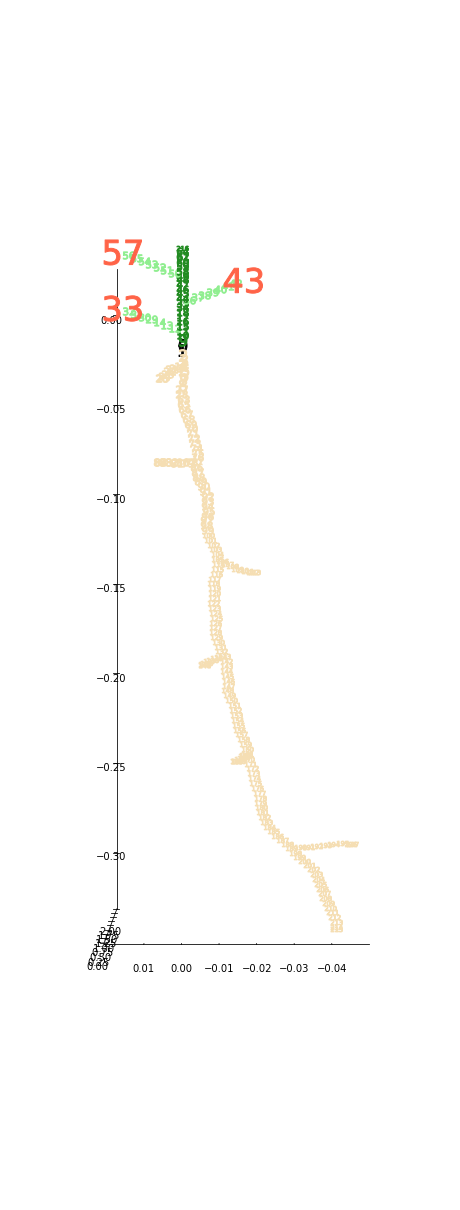

In [92]:
from mpl_toolkits.mplot3d import axes3d
stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 3)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return 'forestgreen'
    else:
        return 'black'
    
nodes_cor = python_nodes(plant)

plt.rcParams['figure.figsize'] = [8, 22]


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt





fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =nodes_cor[:,3]
y =nodes_cor[:,4]
z =nodes_cor[:,5]

# Get rid of colored axes planes
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# Bonus: To get rid of the grid as well:
ax.grid(False)

for i in range(len(nodes_cor)): #assign all the source to red large font size
    if (nodes_cor[i,1] == 8 or nodes_cor[i,1] == 4) and nodes_cor[i,2] == 1:
        ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(i),
                markersize=40, color='tomato')
    else:
        ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(i),#mapping all the organ color green or yellow
                markersize=12, color=organ_color(i))

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
ax.set_ylim3d(2,0)
# ax.set_zlim3d(-1,7.5)
# ax.set_xlim3d(-0.2,0.2)
ax.view_init(0, 90)
plt.show()
fig.savefig("{}.png".format('3d with node number{}'.format(name)), bbox_inches='tight', dpi=300)

In [ ]:
plant.simulate(time)
plant.write("{}.vtp".format(str(name)))
dict_all  = convert( plant )
piafmunch_outputname = name +".ini"

write_PiafMunch_parameter(dict_all['node_connection'], dict_all['nodes_organtype'], dict_all['nodes_r_st'], dict_all['unq_cnt'], piafmunch_outputname)